In [56]:
import skimage as ski
import matplotlib.pyplot as plt
import numpy as np

In [24]:
raw_image = ski.io.imread("data/good_condensates.tif")[0]

<tifffile.TiffFile 'good_condensates.tif'> OME series expected 1 frames, got 2
<tifffile.TiffFile 'good_condensates.tif'> OME series cannot handle discontiguous storage ((1920, 2560, 3) != (3, 1920, 2560))


In [25]:
raw_image.shape

(1920, 2560, 3)

In [34]:
grey_image = ski.color.rgb2gray(raw_image)

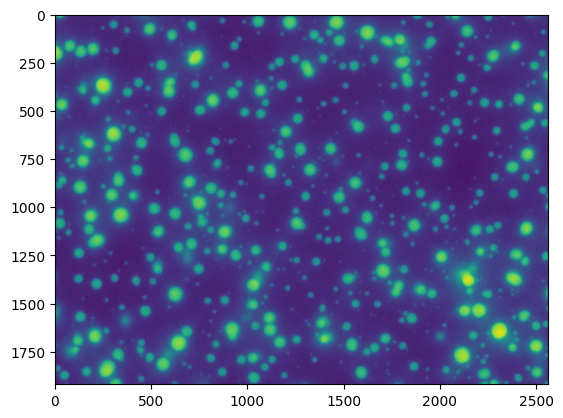

In [36]:
plt.imshow(grey_image)

In [57]:
img_mean = np.mean(grey_image)

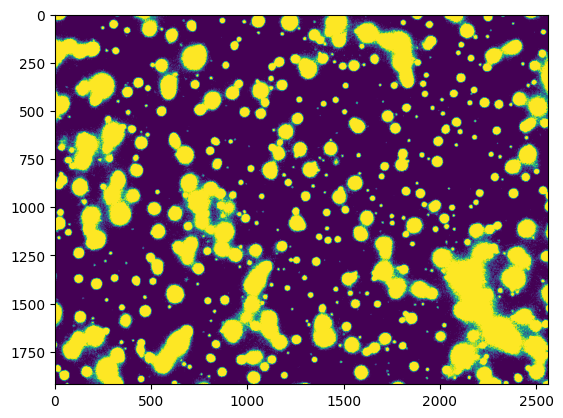

C:\Users\danie\AppData\Local\Temp\ipykernel_27876\2483203175.py:7: UserWarning: otsu.tiff is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  ski.io.imsave("otsu.tiff", otsu_threshold)


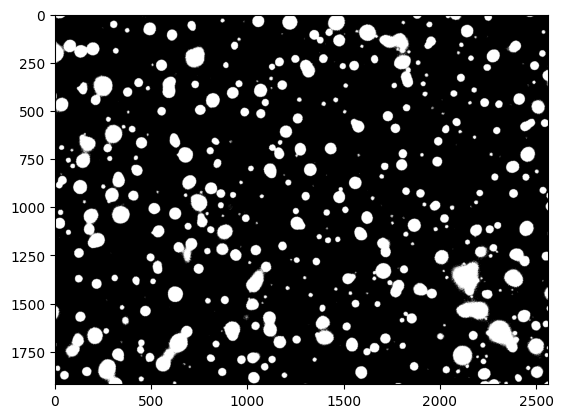

In [68]:
otsu_threshold_mask = ski.filters.threshold_otsu(grey_image)
otsu_threshold = grey_image >= otsu_threshold_mask

plt.imshow(otsu_threshold, cmap=plt.cm.gray)

ski.io.imsave("grey.tiff", grey_image)
ski.io.imsave("otsu.tiff", otsu_threshold)


C:\Users\danie\code\llps_analysis\venv\Lib\site-packages\IPython\core\interactiveshell.py:3526: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


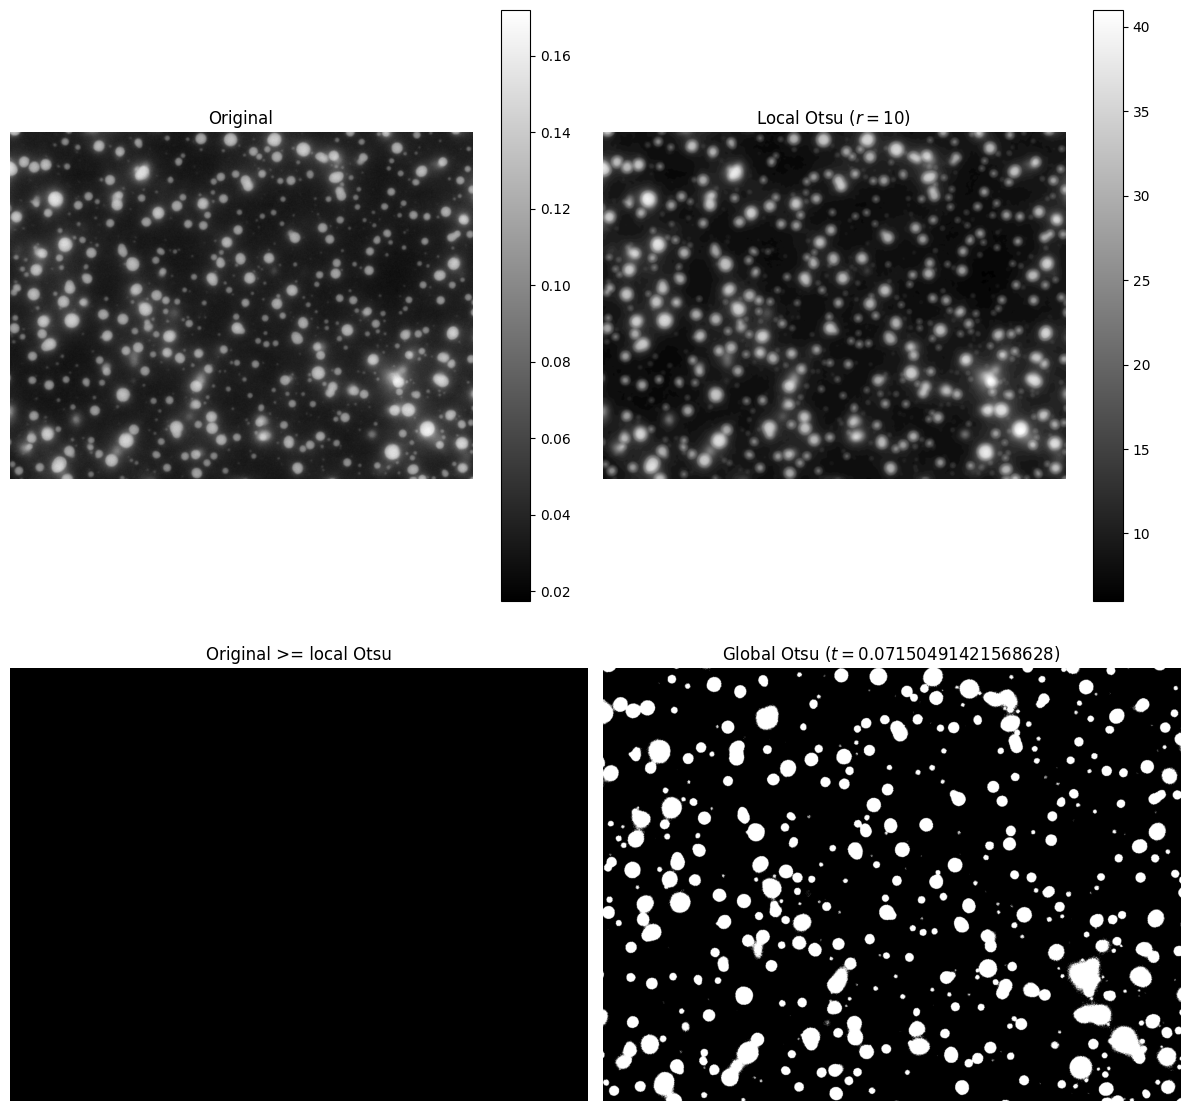

In [64]:
p8 = grey_image

radius = 10
footprint = ski.morphology.disk(radius)

# t_loc_otsu is an image
t_loc_otsu = ski.filters.rank.otsu(p8, footprint)
loc_otsu = p8 >= t_loc_otsu

# t_glob_otsu is a scalar
t_glob_otsu =  ski.filters.threshold_otsu(p8)
glob_otsu = p8 >= t_glob_otsu

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12),
                         sharex=True, sharey=True)
ax = axes.ravel()

fig.colorbar(ax[0].imshow(p8, cmap=plt.cm.gray), ax=ax[0])
ax[0].set_title('Original')

fig.colorbar(ax[1].imshow(t_loc_otsu, cmap=plt.cm.gray), ax=ax[1])
ax[1].set_title(f'Local Otsu ($r={radius}$)')

ax[2].imshow(p8 >= t_loc_otsu, cmap=plt.cm.gray)    
ax[2].set_title('Original >= local Otsu')

ax[3].imshow(glob_otsu, cmap=plt.cm.gray)
ax[3].set_title(f'Global Otsu ($t={t_glob_otsu}$)')

for a in ax:
    a.axis('off')

plt.tight_layout()